# TITANIC:Machine Learning From Diaster


## Predict survival on the Titanic
* Imporing libraries
* Collecting the data
* Exploratory data analysis
* Feature engineering
* Modelling
* Testing

we  gonna apply the tools of machine learning to predict which passengers survived the Titanic tragedy.
}

## 1.Import Necessary libraries 

In [1595]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
import missingno as mn


# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC


## 2.Load Dataset 
Data is provided by the kaggle site

Data is divided in 2 parts:
* Train set- used to rain our model
* Test set- used to check the performance of our model**


In [1596]:
train=pd.read_csv('../input/titanic/train.csv')
test=pd.read_csv('../input/titanic/test.csv')


## 3.Exploratory data analysis
we will use pandas to learn from our data about different features , and will see shape of our train,test datset.
train set will have 1 less feautes i.e survived coloumn.



In [1597]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1598]:
train.shape


(891, 12)

In [1599]:
test.shape
#test data set

(418, 11)

In [1600]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1601]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


* We can see that Age value is missing for many rows.
* Out of 891 rows , the age value is present only in 714 rows
* similarly,Cabin values are also missing in many rows. Only 204 out of 891 rows have cabin values.

In [1602]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are 177 missing age values,687 missing cabin vaules and 2 embarked values

In [1603]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## 3.1.Using python lib for visualizaion

we already imported important libraries.



## Bar Chart for Categorical Feataures
* Pclass
* Sex 
* SibSp
* Parch
* Embarked
* Cabin 

In [1604]:
def bar_chart(feature):
    survived=train[train['Survived']== 1][feature].value_counts()
    dead=train[train['Survived']== 0][feature].value_counts()
    df=pd.DataFrame([survived,dead])
    df.index=['Survived','Dead']
    df.plot(kind='bar',stacked=True,figsize=(10,5))


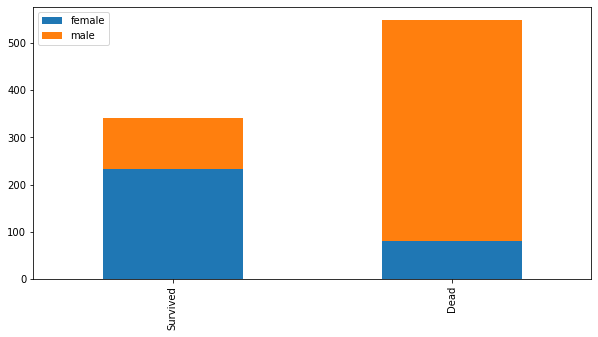

In [1605]:
bar_chart('Sex')

This confirms **Women** more likely survived than **man**.

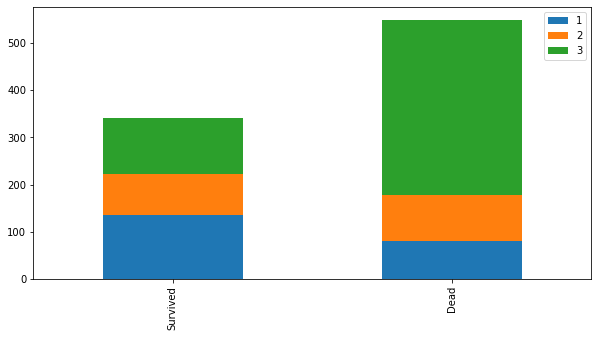

In [1606]:
bar_chart('Pclass')

This chart shows that ****1st Class**** more likely survived than other clases.

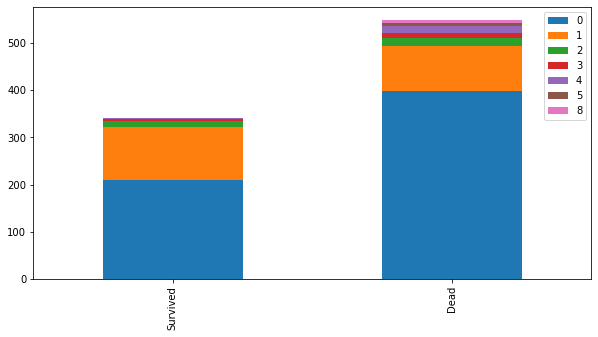

In [1607]:
bar_chart('SibSp')

This char cinfirms **a person aboarded with more than 2 siblings or spouse** more likely survived

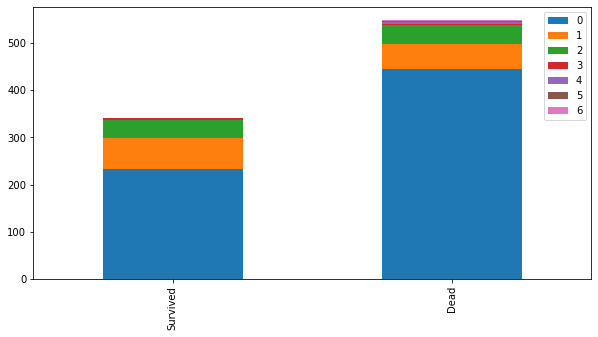

In [1608]:
bar_chart('Parch')

**A person aboarded wih more than 2 parents or children** more likely survived.

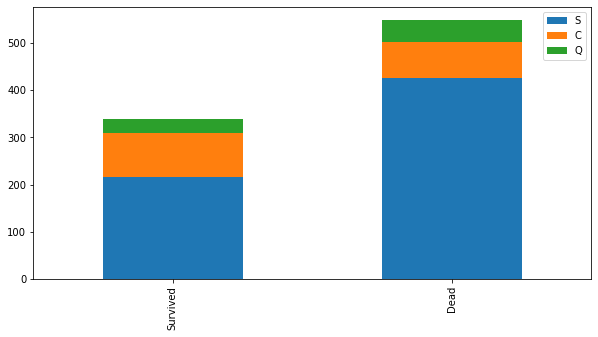

In [1609]:
bar_chart('Embarked')

**Aperson aboarded from C** slightly more likely survived.

 ## 4.Feature Engineering
 
 Feature Engineering is he process os using domain knowledge os the data to create features
 that makes machine learning algo works.
 
 Feaure vector is an n-dimensional vector of numerical fetaures that represent some object.
 Many algo in ML require a numerical representation of obejcts, single such representations 
 faciliaes processing and statistical analysis.

## 4.1.How titanic sink? 

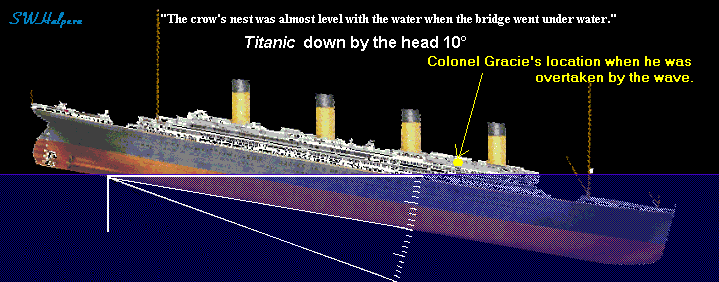

The immediate cause of RMS Titanic's demise was a collision with an iceberg that caused the ocean liner to sink on April 14–15, 1912. While the ship could reportedly stay afloat if as many as 4 of its 16 compartments were breached, the impact had affected at least 5 compartments.It was originally believed that the iceberg had caused a long gash in the hull. After examining the wreck, however, scientists discovered that the collision had produced a series of thin gashes as well as brittle fracturing and separation of seams in the adjacent hull plates, thus allowing water to flood into the Titanic. Later examination of retrieved ship parts—as well as paperwork in the builder’s archives—led to speculation that low-quality steel or weak rivets may have contributed to the sinking.

In [1610]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## 4.2.Converting datatype
coverting sex datatype

In [1611]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Converting Sex datatype

In [1612]:
train_test_data=[train,test]
sex_mapping={"male":0,"female":1}
for dataset in train_test_data:
    dataset['Sex']=dataset['Sex'].map(sex_mapping)
    

### Converting Embarked datatype

In [1613]:
embarked_mapping={"S":0,"C":1,"Q":2}
for dataset in train_test_data:
    dataset['Embarked']=dataset['Embarked'].map(embarked_mapping)

In [1614]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0


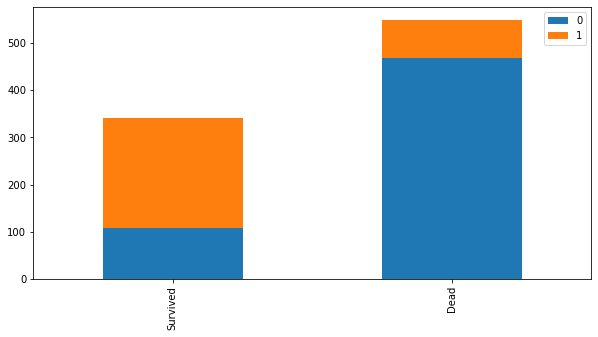

In [1615]:
bar_chart('Sex')

## 4.3.Missing Values**

**Why missing values treatment is required?**

Missing Data in the traing set can reduce he power of a model of a model or can lead to a biased model because we have not analysed the behaviour and realtionship with oher variabkes correctly. it can lead to wrong prediciton .

In [1616]:
#Lets see how many missing datat is there
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Visualize the missing value**

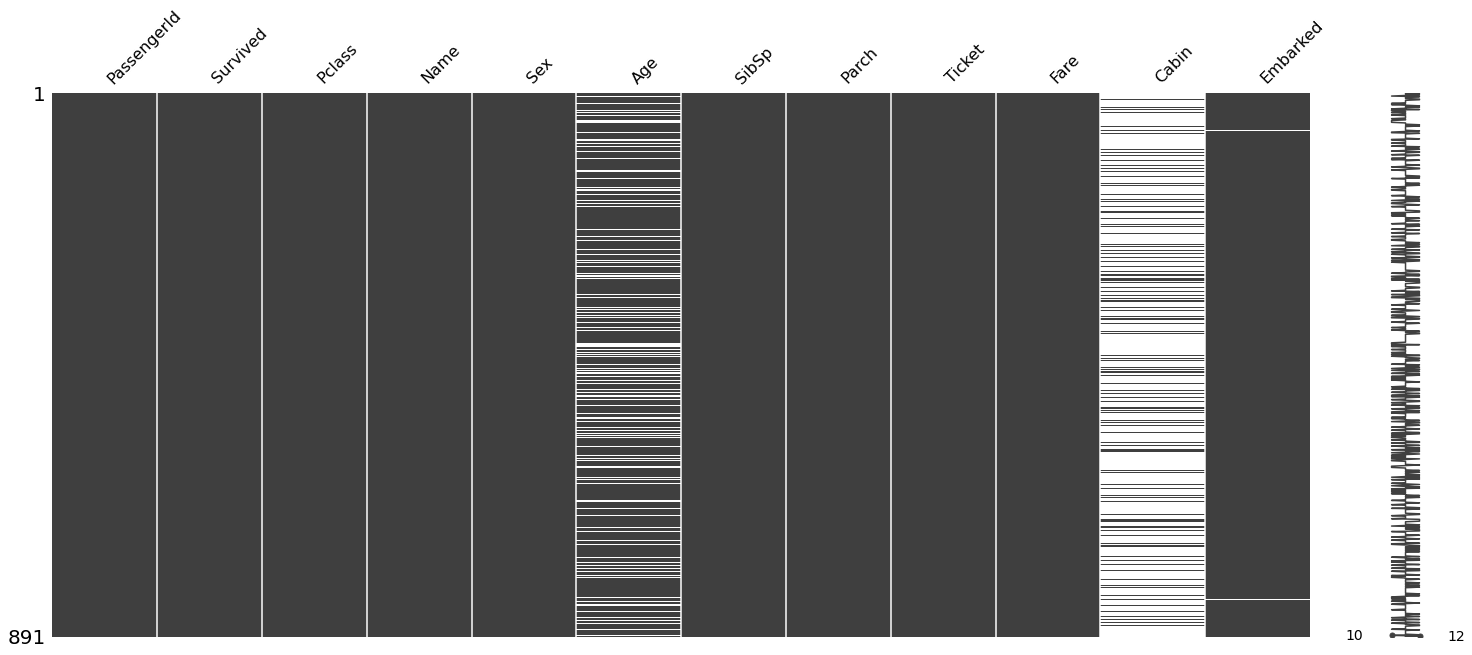

In [1617]:

mn.matrix(train)

## 4.4.Lets deal with missing values
There are large amount of missing values in Cabin feature, hence will drop cabin & impute for missing values of Age & Embarked features.

### * **Dealing with Cabin Data**


In [1618]:
train.drop('Cabin',axis=1,inplace=True)
test.drop('Cabin',axis=1,inplace=True)

### * **Dealing with Embarked Data**

In [1619]:
train.Embarked.value_counts()



0.0    644
1.0    168
2.0     77
Name: Embarked, dtype: int64

* S=0
* C=1
* Q=2

In [1620]:
# Since there are maximum frequency in "0" class, will impute "0" class for 2 missing values 
train['Embarked'].fillna("0", inplace=True) 


### * **Dealing with Age data**

Roughly 20% of the age data is missing.The proportion of age missing is likely small enough for reasonable replacement witht some form of imputaion.


In [1621]:
# Fill by median
missing_val_median = ['Age']

for col  in missing_val_median:
    train[col] = train[col].fillna(value=train[col].median())
    test[col] = test[col].fillna(value=test[col].median())
    


In [1622]:
#We can check now is there any missing values or not. 
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [1623]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

## 4.5.Droping unnecessary features

In [1638]:

features_drop = ['Ticket','Name','Fare']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

## **5.Modelling**

In [1639]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.0,1,0,0
1,1,1,1,38.0,1,0,1
2,1,3,1,26.0,0,0,0
3,1,1,1,35.0,1,0,0
4,0,3,0,35.0,0,0,0


In [1640]:

train_data = train.drop('Survived', axis=1)
target = train['Survived']
train_data.shape,target.shape

((891, 6), (891,))

## **Cross-validation **

In [1641]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

## 5.1.KNN

In [1642]:

clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.71111111 0.80898876 0.74157303 0.73033708 0.83146067 0.75280899
 0.76404494 0.78651685 0.73033708 0.7752809 ]


In [1643]:

# kNN Score
round(np.mean(score)*100, 2)

76.32

## 5.2.DecisionTree Classifier

In [1644]:

clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)


[0.77777778 0.82022472 0.73033708 0.80898876 0.86516854 0.84269663
 0.78651685 0.76404494 0.79775281 0.76404494]


In [1645]:
# decision tree Score
round(np.mean(score)*100, 2)

79.58

## 5.3.RandomForest Classifier

In [1646]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.75555556 0.83146067 0.7752809  0.78651685 0.84269663 0.83146067
 0.79775281 0.82022472 0.7752809  0.80898876]


In [1647]:

# Random Forest Score
round(np.mean(score)*100, 2)


80.25

## 5.4.SVM

In [1648]:

clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.6        0.68539326 0.70786517 0.60674157 0.69662921 0.66292135
 0.60674157 0.68539326 0.60674157 0.5505618 ]


In [1652]:

round(np.mean(score)*100,2)


64.09

## 7.Testing

In [1653]:
clf = SVC()
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)


In [1654]:

submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)


In [1655]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
